In [713]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import math 
%matplotlib inline

In [714]:
# Define the Guassian Kernel
t = 0.5
c = .001
gausskernel = lambda i, j: c * np.exp( (-1.0 /  ( 2.0 * t**2 )) * (i - j)**2 )

In [715]:
def kernel(kernelfunc, size):
    return np.fromfunction(lambda i, j: kernelfunc(i, j), (size, size))
    + np.identity(size) * 1e-4  # make matrix diagonally dominant. 

In [716]:
kernel = kernel(gausskernel, 10)  # create a precicision or kernel matrix
# print(kernel)

In [717]:
covmatrix = tf.linalg.inv(kernel)  # invert kernel/precision matrix to get covariance matrix. 
# print(kernel)

In [718]:
# print(tf.linalg.matmul(kernel, covmatrix))  # insure it is an inverse

In [719]:
def create_normal_distribution(kernel): 
    mu, cov = np.zeros(tf.shape(kernel).numpy()[0]), tf.linalg.inv(kernel)
    scale = tf.linalg.cholesky(cov)
    return tfp.distributions.MultivariateNormalTriL(loc=mu,scale_tril=scale)

In [720]:
mvn = create_normal_distribution(kernel)

In [734]:
xi = np.linspace(-4,4,100) # this will be the domain we will be looking at of the RKHS space. 

# create a matrix that will store the domains of the sampled value (linespace).
# each column will be the same since we are analyzing them in the same domain.  
y = np.reshape(xi.T, (xi.shape[0], 1)) # create a transpose of x (since each col will represent the points we are eval at)
X = y
for i in range (0, 12-1): # range == # of datums in original dataset. 
    X = np.concatenate((X, y), axis=1)

# create functions evaluated at the 10 different basis functions 
# each basis function is a kernel evaluated at each point holding second variable constant. 
# in this case we are evaluating the second variable at (almost) all possible points (large number of rows representing domain)
Kx = np.zeros((X.shape[0], 10))
for i in range(Kx.shape[0]): 
    for j in range(Kx.shape[1]): 
        Kx[i, j] = gausskernel(j - 4, X[i, j])  # change to i - m - 1 


# now create the weighted functions now representing the actual functions in RKHS. 
alphas = mvn.sample([12]).numpy() # sample the alpha weights by which each kernel function will be weighed. 
# each fx will need its own alpha. Amount sampled is the amount of sample functions we want to generate. 
Fx = np.matmul(Kx, alphas.T)

(100, 12)
(100, 12)


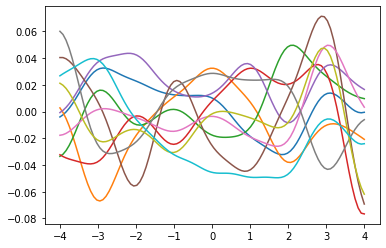

In [735]:
print(X.shape)
print(Fx.shape)
for i in range(0, 10): 
    plt.plot(X[:, i], Fx[:, i])


In [723]:
#print(X[:,1])

In [724]:
alphas = mvn.sample().numpy() # sample the alpha weights by which each kernel function will be weighed. 
x = np.linspace(-4,4,100) # this will be the domain we will be looking at of the RKHS space. 
y = alphas[-4] * gausskernel(0, x)
for i in range(1, 10): 
    y += alphas[i] * gausskernel(i - 4 , x)

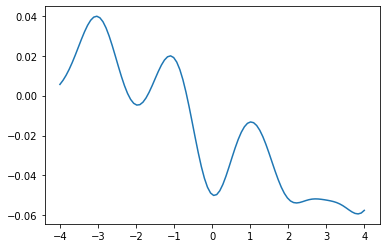

In [725]:
plt.plot(x, y)